Notebook to replicate the graphs on D. Hoang-Binh paper. The same graph created in notebook radiative_data_for_transition, but for different n

In [1]:
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np
import scipy.constants
import math

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

# Working with a Hydrogen atom
atom = Hydrogen()

# Define the transition we are studing
# Upper state
# n1 = 111
# n1 = 112
# n1 = 120
# n1 = 200
n1 = 1000
# Lower state: it is always 110
n2 = 110

In [2]:
# I am going to use a NumPy array to store the calculations data.
# 2 Dimensions: Rows are the number of l values calculating
#               Columns 9, defined as:
#                   0 : l value use in all calculations in this row
#                   1 : R(n1,l;n2,l-1) - using ARC
#                   2 : R(n1,l;n2,l+1) - using ARC
#                   3 : f(n2,l-1;n1,l) - this calculation will use value stored in [1]
#                   4 : f(n2,l+1;n1,l) - this calculation will use value stored in [2]
#                   5 : A(n1,l;n2,l-1) - using D. Hoang-Binh formula and value in [1]
#                   6 : A(n1,l;n2,l+1) - using D. Hoang-Binh formula and value in [2]
#                   7 : A(n1,l;n2,l-1) - using ARC and value in [1]
#                   8 : A(n1,l;n2,l+1) - using ARC and value in [2]
# Define varialbes for column index, for clarity
value_l = 0
R_l_minus1 = 1
R_l_plus1 = 2
f_l_minus1 = 3
f_l_plus1 = 4
A_l_minus1 = 5
A_l_plus1 = 6
A_arc_l_minus1 = 7
A_arc_l_plus1 = 8

# Define the values of l that we are going to calculate: comment the line not used
# Using a Numpy ndarray
# States calculated in the paper
#l_states = [0,1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,105,106,107,108,109,110]

# Full use of the data structure
# columns = 8
# Only calculate the dipole moment
columns = 2
# All posible states for l, from 0 to n2
l_states = range(n2+1)

# Define the types of the columns
# Initialize the np array with zeros for the calculations and the type for the resusts
data = np.zeros((len(l_states),columns),dtype=np.float64)
# Append the list with l_states, they are cast to float
data = np.column_stack((l_states,data))


In [3]:
# Function to get the Dipole Moment from ARC and check that l state is valid
def getDipoleMoment( n1, l1, j1, n2, l2, j2 ):
    
    if ((l1 >= n1) or (l2 >= n2) or (l1 < 0) or (l2 < 0)):
        return float('nan')

    # Transition frequency Hz
    if ( ( (j1 == (l1+0.5)) or (j1 == (l1-0.5))) and ((j2 == (l2+0.5)) or (j2 ==(l2-0.5) ) ) )  :
        # Eq 2 in 
        R = atom.getRadialMatrixElement(n1, l1, j1, n2, l2, j2)
        return R
    else:
        return float('nan')
    
# Initialise the list that will contain the tuples with the data
plot_data = []
factor = (n1-n2)**(5/3)
    
# Printing the table and doing the calculations
print('Table 1 Radiative data for transitions from n1 = %d n2 = %d in hydrogen (Z = 1)\n' % (n1,n2))
print('R(n1,l1;n2,l2)^2 Dipole moment for l')
print('  l\tl2= l1 -1\t\tl2= l1 +1')
print('-------------------------------------------------')
i=0 # Iterator for the row we are working on
for l in data[:,value_l]:
    # Each l is the value of l for this calculation
    l_int = int(l)
    # Here I square the dipole moment, so it is saved squared
    data[i][R_l_minus1] = getDipoleMoment(n1, l_int, l+0.5, n2, l_int-1, l-0.5)**2
    data[i][R_l_plus1] =  getDipoleMoment(n1, l_int, l+0.5, n2, l_int+1, l+0.5)**2
    
    print('%3d\t%9.3e\t\t%.3e ' % (l,data[i][R_l_minus1],data[i][R_l_plus1]))
    
    # Calculate the data to plot the next graphic
    # It is a list to tuple, each tuple is (x,y), where x = (l(l-l')/n') and y = (n1-n2)**(5/3) *[R(n,l;n',l')]**2
    if  not math.isnan(data[i][R_l_minus1]):
        plot_data.append((l_int/n2,factor * data[i][R_l_minus1]))
    
    if not math.isnan(data[i][R_l_plus1]):
        plot_data.append((-l_int/n2,factor * data[i][R_l_plus1]))    
    
    
    # Next iteration
    i+=1

Table 1 Radiative data for transitions from n1 = 1000 n2 = 110 in hydrogen (Z = 1)

R(n1,l1;n2,l2)^2 Dipole moment for l
  l	l2= l1 -1		l2= l1 +1
-------------------------------------------------
  0	      nan		5.218e-02 
  1	6.041e-02		4.833e-02 
  2	6.478e-02		4.467e-02 
  3	6.929e-02		4.120e-02 
  4	7.392e-02		3.792e-02 
  5	7.864e-02		3.482e-02 
  6	8.343e-02		3.191e-02 
  7	8.825e-02		2.918e-02 
  8	9.305e-02		2.662e-02 
  9	9.778e-02		2.422e-02 
 10	1.024e-01		2.198e-02 
 11	1.069e-01		1.988e-02 
 12	1.111e-01		1.793e-02 
 13	1.150e-01		1.611e-02 
 14	1.186e-01		1.441e-02 
 15	1.218e-01		1.284e-02 
 16	1.245e-01		1.138e-02 
 17	1.267e-01		1.003e-02 
 18	1.284e-01		8.795e-03 
 19	1.295e-01		7.665e-03 
 20	1.300e-01		6.639e-03 
 21	1.299e-01		5.714e-03 
 22	1.292e-01		4.888e-03 
 23	1.279e-01		4.157e-03 
 24	1.260e-01		3.516e-03 
 25	1.235e-01		2.960e-03 
 26	1.206e-01		2.483e-03 
 27	1.172e-01		2.077e-03 
 28	1.133e-01		1.735e-03 
 29	1.090e-01		1.449e-03 
 30	1.044e-01		1.212e-03

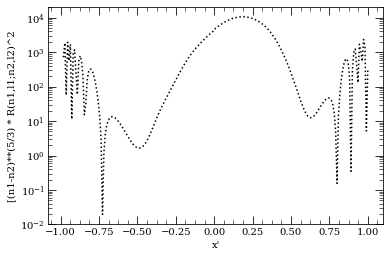

In [4]:
# Define a function to return the value of the first element of the tuple, so we can sort the X axis
def getKey(item):
    return item[0]

# Sort the x value on the plot_data and print the graphic
plot_data.sort(key=getKey)

x_axis = []
y_axis = []

for i in plot_data:
    x_axis.append(i[0])
    y_axis.append(i[1])


ax = plt.subplot(111)
#ax.plot(x_axis,y_axis)
ax.semilogy(x_axis,y_axis,"k:")
ax.set_xlabel(r"x'")
ax.set_ylabel(r"[(n1-n2)**(5/3) * R(n1,l1;n2,l2)^2")
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()


In [5]:
for i in plot_data:
    print(i)

(-0.9818181818181818, 713.9483882223386)
(-0.9727272727272728, 1882.0173453030684)
(-0.9636363636363636, 56.58199661513477)
(-0.9545454545454546, 1931.6425549626222)
(-0.9454545454545454, 561.8504871235795)
(-0.9363636363636364, 1692.8831045882791)
(-0.9272727272727272, 11.36876418226241)
(-0.9181818181818182, 940.4682928850292)
(-0.9090909090909091, 1172.5343964644394)
(-0.9, 239.96440644929652)
(-0.8909090909090909, 58.8348860345212)
(-0.8818181818181818, 545.2986498966168)
(-0.8727272727272727, 784.711015668573)
(-0.8636363636363636, 562.0118447876446)
(-0.8545454545454545, 208.38904335682415)
(-0.8454545454545455, 15.2480219688107)
(-0.8363636363636363, 29.29058052393051)
(-0.8272727272727273, 150.62908931806476)
(-0.8181818181818182, 268.68324479547687)
(-0.8090909090909091, 325.507117746042)
(-0.8, 316.2310040852095)
(-0.7909090909090909, 262.9294022977367)
(-0.7818181818181819, 192.31083622331568)
(-0.7727272727272727, 124.97878601963596)
(-0.7636363636363637, 71.61532224868142)

Maximum
(0.18181818181818182, 10705.024388951333)

Minimum
(-0.7272727272727273, 0.019548909936121024)

-l_int/n2 = -0.72727272 -> -l_int = 110 * -0.72727272 -> l_int = 80

l   l - 1           l + 1
80	5.236e-04		2.374e-07 





In [6]:
l = 80
resultMinus = getDipoleMoment(n1, l, l+0.5, n2, l-1, l-0.5)**2
resultPlus = getDipoleMoment(n1, l, l+0.5, n2, l+1, l+0.5)**2
print('%d\t%e\t%e' % (l_int,resultMinus,resultPlus))

110	5.236277e-04	2.373955e-07


In [7]:
l = 80
n1 = 500
resultMinus = getDipoleMoment(n1, l, l+0.5, n2, l-1, l-0.5)**2
resultPlus = getDipoleMoment(n1, l, l+0.5, n2, l+1, l+0.5)**2
print('%d\t%e\t%e' % (l_int,resultMinus,resultPlus))

110	4.539974e-03	8.735627e-05
